<a href="https://colab.research.google.com/github/Nazmin-Babubaker/Dementia-prediction-using-OASIS-dataset/blob/main/OASIS_RD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving oasis_cross-sectional-5708aa0a98d82080 (1).xlsx to oasis_cross-sectional-5708aa0a98d82080 (1).xlsx


**Reasoning**:
Load the Excel file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
display(df.head())

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [ ]:
df = df[df['Age'] >= 60]
df = df.drop(columns=['Delay', 'Hand', 'ID'], axis=1)
display(df.head())

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
11,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055
13,M,76,2.0,NaN,28.0,0.5,1738,0.719,1.010


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
M/F      0
Age      0
Educ     0
SES     18
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


In [ ]:
median_ses = df['SES'].median()
df['SES'] = df['SES'].fillna(median_ses)
display(df.head())

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.000000,29.0,0.0,1344,0.743,1.306
2,F,73,4.0,3.000000,27.0,0.5,1454,0.708,1.207
8,M,74,5.0,2.000000,30.0,0.0,1636,0.689,1.073
11,F,81,5.0,2.000000,30.0,0.0,1664,0.679,1.055
13,M,76,2.0,2.622222,28.0,0.5,1738,0.719,1.010


**Reasoning**:
Check if there are any remaining missing values in the DataFrame to confirm the missing values in 'SES' were filled correctly.



In [ ]:
missing_values_after_filling = df.isnull().sum()
print("Missing values per column after filling:")
print(missing_values_after_filling)

Missing values per column after filling:
M/F     0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64


In [ ]:
df_male = df[df['M/F'] == 'M']
df_female = df[df['M/F'] == 'F']
print('male dataset')
display(df_male.head())
print('female dataset')
display(df_female.head())

male dataset


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
8,M,74,5.0,2.000000,30.0,0.0,1636,0.689,1.073
13,M,76,2.0,2.622222,28.0,0.5,1738,0.719,1.010
14,M,82,2.0,4.000000,27.0,0.5,1477,0.739,1.188
21,M,82,2.0,3.000000,27.0,0.5,1420,0.710,1.236
28,M,88,1.0,4.000000,26.0,1.0,1419,0.674,1.236


female dataset


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
11,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055
17,F,89,5.0,1.0,30.0,0.0,1536,0.715,1.142
19,F,80,3.0,3.0,23.0,0.5,1794,0.765,0.978


In [ ]:
df_male = df[df['M/F'] == 'M'].copy()
df_female = df[df['M/F'] == 'F'].copy()
df_male['demented'] = (df_male['CDR'] >= 0.5).astype(int)
df_female['demented'] = (df_female['CDR'] >= 0.5).astype(int)
display(df_male.head())
display(df_female.head())

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,demented
8,M,74,5.0,2.000000,30.0,0.0,1636,0.689,1.073,0
13,M,76,2.0,2.622222,28.0,0.5,1738,0.719,1.010,1
14,M,82,2.0,4.000000,27.0,0.5,1477,0.739,1.188,1
21,M,82,2.0,3.000000,27.0,0.5,1420,0.710,1.236,1
28,M,88,1.0,4.000000,26.0,1.0,1419,0.674,1.236,1


,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,demented
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
11,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,0
17,F,89,5.0,1.0,30.0,0.0,1536,0.715,1.142,0
19,F,80,3.0,3.0,23.0,0.5,1794,0.765,0.978,1


**Reasoning**:
Count the number of demented and non-demented individuals in the male and female dataframes.

In [ ]:
demented_counts_male = df_male['demented'].value_counts()
demented_counts_female = df_female['demented'].value_counts()

print("Demented counts in male dataset:")
print(demented_counts_male)

print("\nDemented counts in female dataset:")
print(demented_counts_female)

Demented counts in male dataset:
demented
1    41
0    26
Name: count, dtype: int64

Demented counts in female dataset:
demented
0    72
1    59
Name: count, dtype: int64


## Split data

### Subtask:
Split both the male and female datasets into training and testing sets using stratification on the 'demented' column.


In [ ]:
from sklearn.model_selection import train_test_split

X_male = df_male.drop(columns=['M/F', 'demented', 'CDR'])
y_male = df_male['demented']

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, stratify=y_male)

X_female = df_female.drop(columns=['M/F', 'demented', 'CDR'])
y_female = df_female['demented']

X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, stratify=y_female)

print("Male dataset shapes:")
print("X_train_male shape:", X_train_male.shape)
print("X_test_male shape:", X_test_male.shape)
print("y_train_male shape:", y_train_male.shape)
print("y_test_male shape:", y_test_male.shape)

print("\nFemale dataset shapes:")
print("X_train_female shape:", X_train_female.shape)
print("X_test_female shape:", X_test_female.shape)
print("y_train_female shape:", y_train_female.shape)
print("y_test_female shape:", y_test_female.shape)

Male dataset shapes:
X_train_male shape: (46, 7)
X_test_male shape: (21, 7)
y_train_male shape: (46,)
y_test_male shape: (21,)

Female dataset shapes:
X_train_female shape: (91, 7)
X_test_female shape: (40, 7)
y_train_female shape: (91,)
y_test_female shape: (40,)


## Train models

### Subtask:
Train a Random Forest classifier separately on the training data for male and female subjects.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_male = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
model_male.fit(X_train_male, y_train_male)

model_female = RandomForestClassifier(random_state=42, n_estimators=40, max_depth=2, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
model_female.fit(X_train_female, y_train_female)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=40, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_male = model_male.predict(X_test_male)
y_pred_female = model_female.predict(X_test_female)

accuracy_male = accuracy_score(y_test_male, y_pred_male)
precision_male = precision_score(y_test_male, y_pred_male)
recall_male = recall_score(y_test_male, y_pred_male)
f1_male = f1_score(y_test_male, y_pred_male)

accuracy_female = accuracy_score(y_test_female, y_pred_female)
precision_female = precision_score(y_test_female, y_pred_female)
recall_female = recall_score(y_test_female, y_pred_female)
f1_female = f1_score(y_test_female, y_pred_female)

print("Male Model Performance:")
print(f"Accuracy: {accuracy_male:.4f}")
print(f"Precision: {precision_male:.4f}")
print(f"Recall: {recall_male:.4f}")
print(f"F1-score: {f1_male:.4f}")

print("\nFemale Model Performance:")
print(f"Accuracy: {accuracy_female:.4f}")
print(f"Precision: {precision_female:.4f}")
print(f"Recall: {recall_female:.4f}")
print(f"F1-score: {f1_female:.4f}")

Male Model Performance:
Accuracy: 0.7143
Precision: 0.6842
Recall: 1.0000
F1-score: 0.8125

Female Model Performance:
Accuracy: 0.8750
Precision: 0.8824
Recall: 0.8333
F1-score: 0.8571


# Task
Analyze feature importance using SHAP for the trained Random Forest models on the male and female datasets, and visualize the results using beeswarm and bar plots.

## Install shap

### Subtask:
Install the SHAP library.


**Reasoning**:
Install the shap library using pip.



In [ ]:
%pip install shap

In [ ]:
import shap

# Create a SHAP explainer for the female model
explainer_female = shap.TreeExplainer(model_female)
shap_values_female = explainer_female.shap_values(X_train_female)[:, :, 1]

# Create a SHAP explainer for the male model
explainer_male = shap.TreeExplainer(model_male)
shap_values_male = explainer_male.shap_values(X_train_male)[:, :, 1]

print("SHAP values calculated for female and male models.")

SHAP values calculated for female and male models.


## Visualize SHAP Results (Beeswarm)

### Subtask:
Generate beeswarm plots to visualize the distribution of SHAP values for each feature for both male and female datasets.

Beeswarm plot for Male Model:


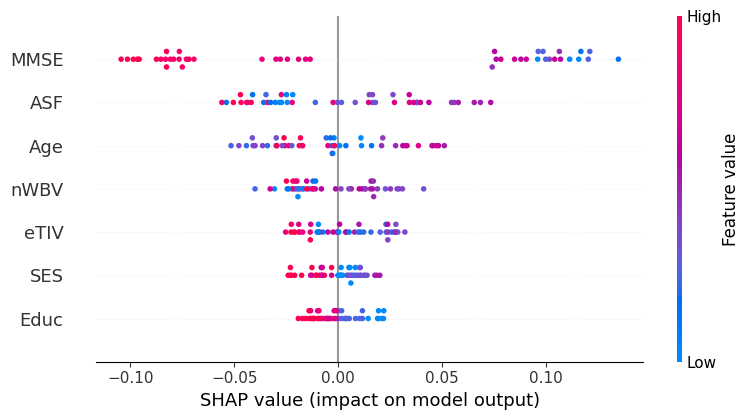


Beeswarm plot for Female Model:


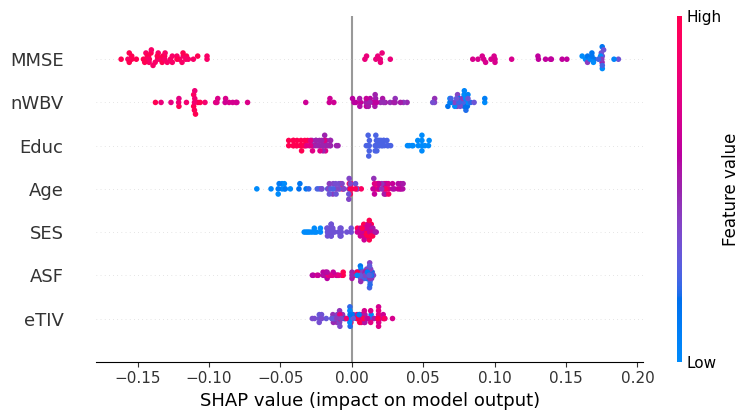

In [ ]:
shap.initjs()

print("Beeswarm plot for Male Model:")
shap.summary_plot(shap_values_male, X_train_male)

print("\nBeeswarm plot for Female Model:")
shap.summary_plot(shap_values_female, X_train_female)

## Visualize SHAP Results (Bar)

### Subtask:
Generate bar plots to visualize the average absolute SHAP values for each feature, showing overall feature importance for both male and female datasets.

Bar plot for Male Model:


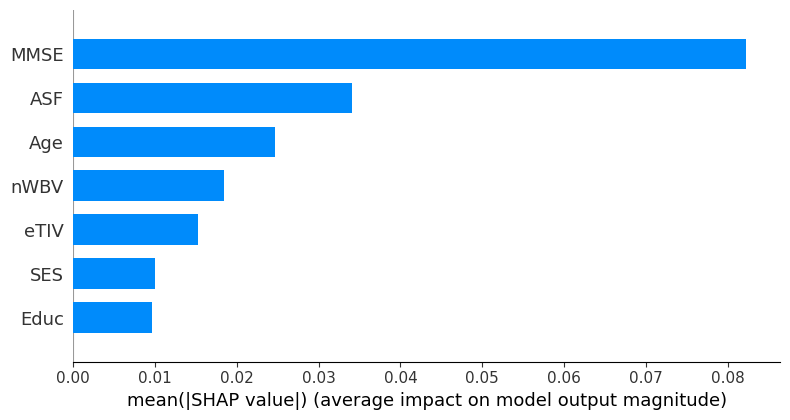


Bar plot for Female Model:


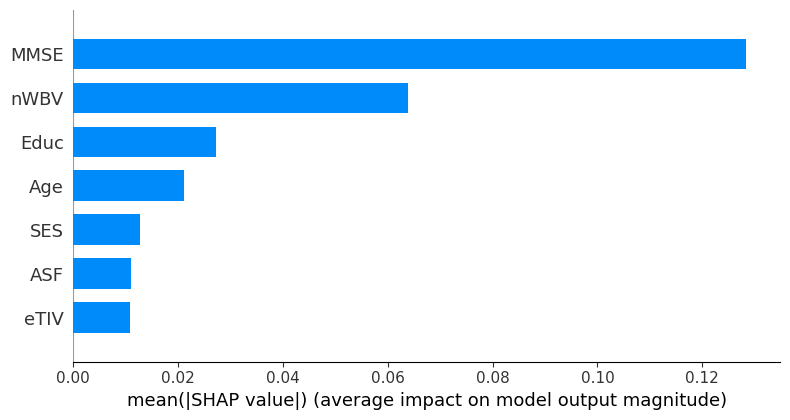

In [ ]:
print("Bar plot for Male Model:")
shap.summary_plot(shap_values_male, X_train_male, plot_type="bar")

print("\nBar plot for Female Model:")
shap.summary_plot(shap_values_female, X_train_female, plot_type="bar")